# Ettoday 網路爬蟲實作練習


* 能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構


## 作業目標

根據範例：

1. 取出今天所有的新聞
2. 取出現在時間兩小時內的新聞
3. 根據範例，取出三天前下午三點到五點的新聞

## 1. 取出今天所有的新聞

In [73]:
#靜態資料
import requests
from bs4 import BeautifulSoup

url = 'https://www.ettoday.net/news/news-list.htm'
r = requests.get(url)

soup = BeautifulSoup(r.text, "html5lib")
#for d in soup.find(class_ = "part_list_2").find_all("h3"):
#    print(d.find(class_ = "date").text,"  ",d.find_all('a')[-1].text)
    
#打開瀏覽器
from selenium import webdriver
browser = webdriver.Chrome(executable_path='./chromedriver')
browser.get("https://www.ettoday.net/news/news-list.htm")

# 取得昨天時間
from datetime import datetime, timedelta
date_time = datetime.now() - timedelta(1)
date_time = date_time.strftime("%Y/%m/%d")
print("取得昨天時間：", date_time)


# 每個兩秒鐘自動往下滑
import time
while True:
    browser.execute_script("window.scrollTo(0,10000000);")
    time.sleep(0.5)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    #print(soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text)
    if date_time in soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text:
        print('=======STOP=======')
        break


# 關閉瀏覽器
browser.quit();



取得昨天時間： 2020/02/12
=======STOP=======


In [45]:

# 取得資料，丟到 BeautifulSoup 解析

#print(soup)
for d in soup.find(class_ = "part_list_2").find_all("h3"):
    if date_time in d.find(class_ = "date").text:
        break
    print(d.find(class_ = "date").text,"  ",d.find_all('a')[-1].text)


2020/02/12 22:11    橫店影視城宣布「2／13起復工」　劇組分階段嚴格管控！
2020/02/12 22:07    網批「外國人才不會跟小孩親嘴」　威廉爸親回：我會自己看著辦
2020/02/12 22:07    11家大廠退出MWC 2020　路透：疫情延燒GSMA將研議取消
2020/02/12 22:05    陳昭榮管女兒服裝尺度　陳品兒露腿捧場迪士尼聯名鑽戒
2020/02/12 22:02    必看！藥水未開封這樣做　千萬別退回給下一個病患
2020/02/12 21:57    日本首架撤僑包機隔離197人「全員陰性」　今晚正式獲准返家
2020/02/12 21:54    萬里頂社透天厝疑電線走火！　女屋主聽到「霹霹啵啵」聞焦味逃生
2020/02/12 21:50    金娃娃、螢光斑馬…趁現在養起來！寵物雲新莊店水族全館6折起～
2020/02/12 21:48    2月10日神秘力量可以「立掃把」　NASA太空員回應揭真相
2020/02/12 21:44    全民防疫大作戰　移民署揪新住民守護家園
2020/02/12 21:35    1妙招延長「口罩使用時間」！藥妝店追加抑菌產品備貨量　免出門就能買
2020/02/12 21:31    富邦人壽祭出「GOLD」4策略迎戰2020年　整合資源、拓展海外市場
2020/02/12 21:31    飯桶活得久！減肥不吃澱粉恐惹「6大疾病」上身　營養師曝：飯比麵好
2020/02/12 21:23    擔心台北車站遊民感染！　小玉買口罩親自發送：能幫多少人是多少
2020/02/12 21:17    「大陸返台！」台中清泉崗小黃沒人敢載　台商8小時走40公里到彰化溪湖求救
2020/02/12 21:08    在家防疫輕鬆投保！英國保誠人壽推「網路保險購物車」　還可線上調整保障額度
2020/02/12 21:05    疫情影響再＋1　蕭敬騰澳洲演唱會「兩場全取消」！
2020/02/12 21:02    HBL／游艾喆挺身護駕　能仁逆轉高苑4連勝獨走
2020/02/12 21:02    貝禮詩草莓奶酒 X 全家超商 推聯名特調　粉紅風讓情人節超甜蜜
2020/02/12 20:56    武漢肺炎疫情嚴重　台灣手指畫家匡乙畫「祈福」
2020/0

2020/02/12 11:23    影／武漢肺炎史上最強！沒症狀也有極高傳染力　冠狀病毒之父坦言防疫難
2020/02/12 11:23    嘉市緊急救護簡易英文問答卡　急救不受國籍和語言限制
2020/02/12 11:21    指邱太三護妻回任高院領高薪退休　黃越宏二審逆轉免賠
2020/02/12 11:21    沒陽台沒窗戶也很舒適！　加國夫妻受困鑽石公主號超樂觀：還叫了葡萄酒
2020/02/12 11:20    趙少康稱防疫靠運氣好　駐德代表寫詩「29個氣」嗆爆！
2020/02/12 11:20    宵夜引發的病毒接力！一代病人「1傳8」致17人確診...同事閒聊3mins就中招
2020/02/12 11:19    南瑤宮笨港進香7天6夜↓2天1夜　全程坐車防疫...信眾貼心喊：媽祖慈悲
2020/02/12 11:17    唐鳳訪華府　美國智庫CSIS邀請分享假訊息應對經驗
2020/02/12 11:17    湖北回來不想隔離14天！　她竟然躲朋友「後車廂」偷闖進上海
2020/02/12 11:17    手機放化妝桌也遭偷襲！　嘴癢汪啃出洞「內餡露出」媽崩潰
2020/02/12 11:13    台灣燈會后里燈區首度設「自動回收機」　賞燈做環保賺回饋
2020/02/12 11:11    中職／肺炎疫情影響　統一獅赴日交流賽取消
2020/02/12 11:10    砰砰砰！道歉了　岡薩雷茲成首位太空人作弊案道歉野手
2020/02/12 11:10    出遊怕染疫...國道客運載客量爆跌！駕駛也喊要補貼　交通部回應了
2020/02/12 11:10    防堵武漢肺炎！小三通「是否暫喊卡」…金門縣政府回應：依中央核定事項辦理
2020/02/12 11:09    董至成爆婚變！　求子8年「LP泡灰色秘方水」再辦事…妻肚皮戳400針才懷孕
2020/02/12 11:09    武漢肺炎疫情吹跑人潮！1500坪海景餐廳全空了　高雄「辦桌天后」淚曝慘況
2020/02/12 11:08    搶情人節商機！台啤微醺系列新口味　草莓口味全家限定上市
2020/02/12 11:08    前疾管局副局長嗆趙少康「蔡英文防疫幸運說」：尖酸刻薄的人永遠閉嘴
2020/02/12 11:07    雲端最前線／政治勝過防

In [47]:
# 取得資料（整理成好的格式）
news = []
for d in soup.find(class_ = "part_list_2").find_all("h3"):
    if date_time in d.find(class_ = "date").text:
        break
    news.append({
        '時間':d.find(class_="date").text,
        '標題':d.find_all('a')[-1].text
    })
    
import pandas as pd
pd.DataFrame(news)

,時間,標題
0,2020/02/12 22:11,橫店影視城宣布「2／13起復工」 劇組分階段嚴格管控！
1,2020/02/12 22:07,網批「外國人才不會跟小孩親嘴」 威廉爸親回：我會自己看著辦
2,2020/02/12 22:07,11家大廠退出MWC 2020 路透：疫情延燒GSMA將研議取消
3,2020/02/12 22:05,陳昭榮管女兒服裝尺度 陳品兒露腿捧場迪士尼聯名鑽戒
4,2020/02/12 22:02,必看！藥水未開封這樣做 千萬別退回給下一個病患
...,...,...
727,2020/02/12 00:08,一米深坑洞「吃了」垃圾車右輪！ 南市吊起後要查下面流水聲
728,2020/02/12 00:05,新加坡「再爆2起」肺炎病例 皆為本地感染無中國旅遊史
729,2020/02/12 00:05,入境全面寫健康聲明卡、陸配子女有條件來台！港澳、新加坡、泰國旅遊警告提升
730,2020/02/12 00:02,泳池發現溺水蜥蜴call消防員 緊急撈上岸…手指CPR驚險救回小命


## 2. 取出現在時間兩小時內的新聞

In [72]:
# 取得昨天時間
news2 = []

from datetime import datetime, timedelta
two_hour_ago = datetime.now() - timedelta(hours = 3)
two_hour_ago_time = two_hour_ago.strftime("%Y/%m/%d %H:%M")

print("取得兩小時前的時間：", two_hour_ago)


for d in soup.find(class_ = "part_list_2").find_all("h3"):
    if datetime.strptime(d.find(class_="date").text, '%Y/%m/%d %H:%M') < two_hour_ago :
        break
    news2.append({
        '時間':d.find(class_="date").text,
        '標題':d.find_all('a')[-1].text
    })
    
    #print(d.find(class_ = "date").text,"  ",d.find_all('a')[-1].text)

import pandas as pd
pd.DataFrame(news2)

取得兩小時前的時間： 2020-02-12 21:12:00.611412


,時間,標題
0,2020/02/12 22:11,橫店影視城宣布「2／13起復工」 劇組分階段嚴格管控！
1,2020/02/12 22:07,網批「外國人才不會跟小孩親嘴」 威廉爸親回：我會自己看著辦
2,2020/02/12 22:07,11家大廠退出MWC 2020 路透：疫情延燒GSMA將研議取消
3,2020/02/12 22:05,陳昭榮管女兒服裝尺度 陳品兒露腿捧場迪士尼聯名鑽戒
4,2020/02/12 22:02,必看！藥水未開封這樣做 千萬別退回給下一個病患
5,2020/02/12 21:57,日本首架撤僑包機隔離197人「全員陰性」 今晚正式獲准返家
6,2020/02/12 21:54,萬里頂社透天厝疑電線走火！ 女屋主聽到「霹霹啵啵」聞焦味逃生
7,2020/02/12 21:50,金娃娃、螢光斑馬…趁現在養起來！寵物雲新莊店水族全館6折起～
8,2020/02/12 21:48,2月10日神秘力量可以「立掃把」 NASA太空員回應揭真相
9,2020/02/12 21:44,全民防疫大作戰 移民署揪新住民守護家園


## 3. 根據範例，取出三天前下午三點到五點的新聞

In [117]:


# 取得昨天時間
from datetime import datetime, timedelta
date_time1 = datetime.now() - timedelta(3)
date_time2 = datetime.now() - timedelta(4)
date_time2 = date_time2.strftime("%Y/%m/%d")
date_time_3 = datetime.now()

date_time_month = int(date_time1.strftime("%m"))
date_time_Day = int(date_time1.strftime("%d"))

three_days_15_clock = date_time_3.strptime(date_time_3.strftime("%Y/%m/%d") + ' 15', '%Y/%m/%d %H')
three_days_17_clock = date_time_3.strptime(date_time_3.strftime("%Y/%m/%d") + ' 17', '%Y/%m/%d %H')
print("取得昨天下午三點：", three_days_15_clock)
print("取得昨天下午五點：", three_days_17_clock)


print(date_time_month,date_time_Day,date_time2)



取得昨天下午三點： 2020-02-13 15:00:00
取得昨天下午五點： 2020-02-13 17:00:00
2 10 2020/02/09


In [103]:
  #打開瀏覽器
from selenium import webdriver
from selenium.webdriver.support.ui import Select

browser = webdriver.Chrome(executable_path='./chromedriver')
browser.get("https://www.ettoday.net/news/news-list.htm")


selectSite = Select(browser.find_element_by_id("selM"))
selectSite.select_by_value(str(date_time_month))

selectYear = Select(browser.find_element_by_id("selD"))
selectYear.select_by_value(str(date_time_Day))


browser.find_element_by_id('button').click()

# 每個兩秒鐘自動往下滑
import time
while True:
    browser.execute_script("window.scrollTo(0,10000000);")
    time.sleep(0.5)
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    #print(soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text)
    if date_time2 in soup.find_all(class_="part_list_2")[-1].find_all('h3')[-1].find(class_="date").text:
        print('=======STOP=======')
        break


# 關閉瀏覽器
browser.quit();



=======STOP=======


<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><head><script async="" referrerpolicy="unsafe-url" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=3&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list.htm" type="text/javascript"></script><script async="" referrerpolicy="unsafe-url" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=https%3A%2F%2Fwww.ettoday.net%2Fnews%2Fnews-list.htm" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script><script src="https://cdn.ampproject.org/rtv/012001281851410/amp4ads-host-v0.js"></script><script async="" loaded="" src="https://api.dmcdn.net/all.js"></script><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-PQ3GKRX&amp;l=
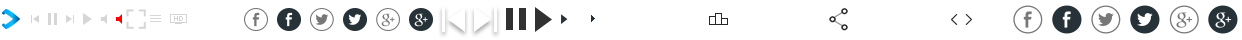
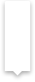
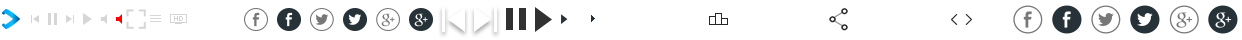
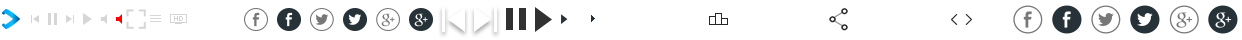
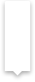
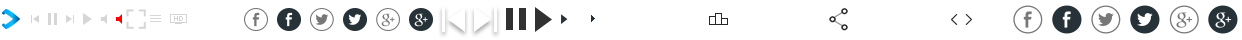

In [104]:
# 取得昨天時間
news3 = []

from datetime import datetime, timedelta
two_hour_ago = datetime.now() - timedelta(hours = 3)
two_hour_ago_time = two_hour_ago.strftime("%Y/%m/%d %H:%M")

print("取得兩小時前的時間：", two_hour_ago)


for d in soup.find(class_ = "part_list_2").find_all("h3"):
    if datetime.strptime(d.find(class_="date").text, '%Y/%m/%d %H:%M') < two_hour_ago :
        break
    news2.append({
        '時間':d.find(class_="date").text,
        '標題':d.find_all('a')[-1].text
    })
    
    #print(d.find(class_ = "date").text,"  ",d.find_all('a')[-1].text)

import pandas as pd
pd.DataFrame(news2)

AttributeError: 'str' object has no attribute 'strftime'